# Plotting of MHD data

In [1]:
import script.pyPLUTO as pp
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.image import imread

import numpy as np
import pandas as pd

# some commonly used constants
CONST_mp = 1.67262171e-24  # gr

Increase rsolution of plots

In [2]:
mpl.rcParams["figure.dpi"] = 150    # about the dpi for a 15 inch 1080p laptop, makes sure the displayed plots are the real size 
#mpl.rcParams["figure.dpi"] = 600

mpl.rcParams["figure.figsize"] = (6, 3)
mpl.rcParams["axes.labelsize"] = 12

mpl.rcParams["axes.formatter.limits"] = (-4, 4)

color=["xkcd:royal blue", "xkcd:vermillion", "xkcd:orange", 
       "xkcd:magenta", "xkcd:lime", "xkcd:yellow", "grey"]
mpl.rcParams["axes.prop_cycle"] = mpl.cycler(color=color)
mpl.rcParams["lines.linewidth"] = .75
mpl.rcParams["axes.linewidth"] = .5

mpl.rcParams["font.size"] = 10

mpl.rcParams["text.usetex"] = True


#mpl.rcParams["figure.facecolor"] = "#fffbf0"
#mpl.rcParams["axes.facecolor"] = "#fffbf0"
#mpl.rcParams["savefig.facecolor"] = '#fffbf0'

Usefull functions

In [3]:
def get_extent(file, firstline):
    """this functions retrieves the extent of the grid (in code-units) and number of points from the grid.out 
    file in one dimension (starting at firstline)
    
    file: the grid.out file
    firstline: the line in the file to look for the number of points in that dimension"""
    with open(file, "r") as gridfile:
        lines = gridfile.readlines()
        # get the number of points
        NUM_POINTS = int(lines[firstline])

        # get the extent of the x-axis (in code units)
        # the first line of the grid, so minimum coordinate
        line = lines[firstline+1]
        parts = line.split()
        # remove the spaces
        for part in parts:
            if part == " ":
                del part
        d_min = float(parts[1])
        # the last line
        line = lines[firstline+NUM_POINTS]
        parts = line.split()
        # remove the spaces
        for part in parts:
            if part == " ":
                del part
        d_max = float(parts[2])
    
    return (NUM_POINTS, (d_min, d_max))

## get metadata of the simulation data

In [4]:
# specify the directories where the data is stored and where the output should be stored
DATA_DIR = "out-raw-Buniform/low-beta05/"
OUT_DIR = "images/"

# define the conversion factors, can be seen when starting the simulation
UNIT_DENSITY = 1e9*CONST_mp
UNIT_LENGTH = 1e8 # cm (1AU)
UNIT_VELOCITY = 1e8 # cm/s
UNIT_TIME = UNIT_LENGTH/UNIT_VELOCITY
UNIT_PRESSURE = 1.673e1   # dyne/cm^2

In [5]:
# get info about the stored data
file_data = pd.read_csv(DATA_DIR+"dbl.out", sep=" ", names=["index", "t", "dt", "step", "type", "little", "rho",
                                                            "vx1", "vx2", "vx3", "Bx1", "Bx2", "Bx3", "prs", "psi_glm", "empty"])
# delete columns that are not needed
for column in ["index", "type", "little", "rho", "vx1", "vx2", "vx3", "Bx1", "Bx2", "Bx3", "prs", "psi_glm", "empty"]:
    del file_data[column]

X_POINTS = 0
Y_POINTS = 0
X_EXTENT = (0,0)
Y_EXTENT = (0,0)

# get the extend of the grid
# get the extent of the x-axis (in code units)
X_POINTS, X_EXTENT = get_extent(DATA_DIR+"grid.out", 9)
# get the extent of the y-axis
Y_POINTS, Y_EXTENT = get_extent(DATA_DIR+"grid.out", 10+X_POINTS)

# number of files saved
N = len(file_data["t"])

# physical extent of the grid
extent_temp = X_EXTENT + Y_EXTENT
extent = [value*UNIT_LENGTH for value in extent_temp]
# physical time data
T = file_data["t"].values*UNIT_TIME

Names of all directories containing data, with extra info about beta and pressure

In [6]:
sims = [
    {"directory":"beta01/", "beta":0.1, "low":False},
    {"directory":"beta05/", "beta":0.5, "low":False},
    {"directory":"beta1/", "beta":1, "low":False},
    {"directory":"beta10/", "beta":10, "low":False},
    {"directory":"ulow-beta01/", "beta":0.1, "low":True},
    {"directory":"ulow-beta05/", "beta":0.5, "low":True},
    {"directory":"ulow-beta1/", "beta":1, "low":True},
    {"directory":"ulow-beta10/", "beta":10, "low":True},
]

## Combined plots

Reading Data file : out-raw-Buniform/beta01//data.0000.dbl
Reading Data file : out-raw-Buniform/beta05//data.0000.dbl
Reading Data file : out-raw-Buniform/beta1//data.0000.dbl
Reading Data file : out-raw-Buniform/beta10//data.0000.dbl
1 5.0
Reading Data file : out-raw-Buniform/ulow-beta01//data.0000.dbl
Reading Data file : out-raw-Buniform/ulow-beta05//data.0000.dbl
Reading Data file : out-raw-Buniform/ulow-beta1//data.0000.dbl
Reading Data file : out-raw-Buniform/ulow-beta10//data.0000.dbl
Reading Data file : out-raw-Buniform/beta01//data.0001.dbl
Reading Data file : out-raw-Buniform/beta05//data.0001.dbl
Reading Data file : out-raw-Buniform/beta1//data.0001.dbl
Reading Data file : out-raw-Buniform/beta10//data.0001.dbl
0.9783324728864162 4.999999988507401
Reading Data file : out-raw-Buniform/ulow-beta01//data.0001.dbl
Reading Data file : out-raw-Buniform/ulow-beta05//data.0001.dbl
Reading Data file : out-raw-Buniform/ulow-beta1//data.0001.dbl
Reading Data file : out-raw-Buniform/ulow

KeyboardInterrupt: 

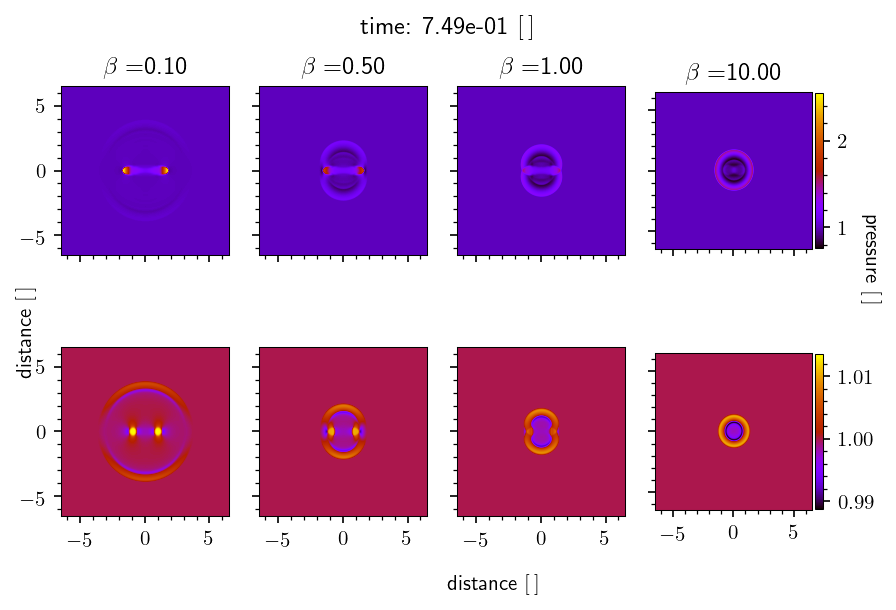

In [35]:
for n in range(0,29):
    fig, ax = plt.subplots(2,4, figsize=(6,4))

    prs_array = []
    min_prs = [1,1]
    max_prs = [1,1]

    ex = [x*1e-8 for x in extent]

    # simulations with high pressure
    for i in range(4):
        DATA_DIR = "out-raw-Buniform/" + sims[i]["directory"]
        D = pp.pload(n, w_dir=DATA_DIR+"/")
        var = D.prs
        prs_array.append(var)
        # find the min and max pressure
        if (m := np.min(var)) < min_prs[0]:
            min_prs[0] = m
        if (m := np.max(var)) > max_prs[0]:
            max_prs[0] = m
        del D

    print(min_prs[0],max_prs[0])

    # simulations with low pressure
    for i in range(4,8):
        DATA_DIR = "out-raw-Buniform/" + sims[i]["directory"]
        D = pp.pload(n, w_dir=DATA_DIR+"/")
        var = D.prs

        prs_array.append(var)
        # find the min and max pressure
        if (m := np.min(var)) < min_prs[1]:
            min_prs[1] = m
        if (m := np.max(var)) > max_prs[1]:
            max_prs[1] = m
        del D

    for i in range(8):
        m = min_prs[i//4]
        M = max_prs[i//4]
        row = i//4
        column = i%4
        axis = ax[row][column]
        # prevent clutter
        if i % 4 != 0:
            axis.set_yticklabels([])
        if i//4 != 1:
            axis.set_xticklabels([])
            
        im = ax[row][column].imshow(prs_array[i], vmin=m, 
                            vmax=M, cmap="gnuplot", extent=ex)
        if sims[i]["low"] and i//4==0:
            ax[row][column].set_title(r"$\beta=$%.2f" %sims[i]["beta"])
        elif i//4==0:
            ax[row][column].set_title(r"$\beta=$%.2f" %sims[i]["beta"])

        if i%4==3:
            cbar = fig.colorbar(im, ax=axis, fraction=0.046, pad=0.02)
            cbar.ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
        axis.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
        axis.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())


    # axis labels
    fig.text(0.5, 0.03, r"distance $[\,]$", va='center')
    fig.text(0.02, 0.45, r"distance $[\,]$", va='center', rotation=90)
    fig.text(0.96, 0.57, r"pressure $[\,]$", va="center", rotation=270)

    # switch the axes on the side on
    for column in range(4):
        ax[1][column].get_xaxis().set_visible(True)
    for row in range(2):
        ax[row][0].get_yaxis().set_visible(True)

    del prs_array


    fig.suptitle(r"time: %.2e $[\,]$" %T[n], y=0.98)    

    plt.tight_layout()

    fig.savefig("out-image/combined/pressure-%02d.png" %n, dpi=300)
    plt.close(fig=fig)

### Group speed MHD waves

formulas for the phase speed

In [7]:
def phase_fast(va, vs, theta):
    return np.sqrt(1/2*(va**2+vs**2 + np.sqrt((va**2+vs**2)**2-4*va**2*vs**2*np.cos(theta)**2)))

def phase_slow(va, vs, theta):
    return np.sqrt(1/2*(va**2+vs**2 - np.sqrt((va**2+vs**2)**2-4*va**2*vs**2*np.cos(theta)**2)))

def phase_alfven(va, theta):
    return va*np.cos(theta)

In [8]:
def group_fast(va, vs, theta, e, z):
    vp = phase_fast(va,vs,theta)
    return (vp**4*e - vs**2*va**2*z*np.cos(theta)) / (vp*(2*vp**2-(vs**2+va**2)))

def group_slow(va, vs, theta, e, z):
    vp = phase_slow(va,vs,theta)
    return (vp**4*e - vs**2*va**2*z*np.cos(theta)) / (vp*(2*vp**2-(vs**2+va**2)))

In [9]:
gamma = 5/3

### pressure imshow with group speed overlay

first 4 plots

Reading Data file : out-raw-Buniform/beta01//data.0025.dbl
Reading Data file : out-raw-Buniform/beta05//data.0025.dbl
Reading Data file : out-raw-Buniform/ulow-beta01//data.0025.dbl
Reading Data file : out-raw-Buniform/ulow-beta05//data.0025.dbl


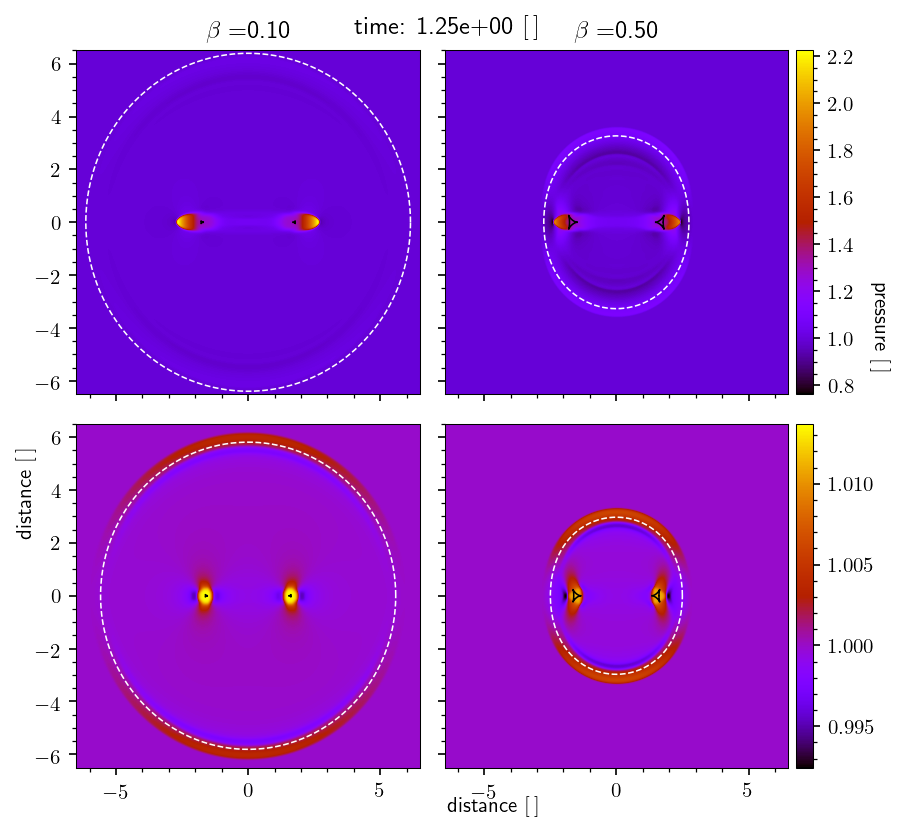

In [33]:
n = 25

sim_list = [sims[0],sims[1],sims[4],sims[5]]

fig, ax = plt.subplots(2,2, figsize=(6,5.5))

prs_array = []
min_prs = [1,1]
max_prs = [1,1]

# initialization for plot group speed
THETA = np.linspace(0,2*np.pi,400)
z = np.array([1,0])
E = np.array([[np.cos(theta), np.sin(theta)] for theta in THETA])
speed_multiplier = [1.1, 1.1, 1, 1]
speed_multiplier_s = speed_multiplier
v0 = 1

ex = [x*1e-8 for x in extent]

# simulations with high pressure
for i in range(2):
    DATA_DIR = "out-raw-Buniform/" + sims[i]["directory"]
    D = pp.pload(n, w_dir=DATA_DIR+"/")
    var = D.prs
    prs_array.append(var)
    # find the min and max pressure
    if (m := np.min(var)) < min_prs[0]:
        min_prs[0] = m
    if (m := np.max(var)) > max_prs[0]:
        max_prs[0] = m
    del D


# simulations with low pressure
for i in range(4,6):
    DATA_DIR = "out-raw-Buniform/" + sims[i]["directory"]
    D = pp.pload(n, w_dir=DATA_DIR+"/")
    var = D.prs

    prs_array.append(var)
    # find the min and max pressure
    if (m := np.min(var)) < min_prs[1]:
        min_prs[1] = m
    if (m := np.max(var)) > max_prs[1]:
        max_prs[1] = m
    del D

for i in range(4):
    # initializations
    m = min_prs[i//2]
    M = max_prs[i//2]
    row = i//2
    column = i%2
    axis = ax[row][column]
    # prevent clutter
    if i % 2 != 0:
        axis.set_yticklabels([])
    if i//2 != 1:
        axis.set_xticklabels([])
    
    im = axis.imshow(prs_array[i], vmin=m, 
                        vmax=M, cmap="gnuplot", extent=ex)
    # plot the pressure map
    if i//2==0:
        axis.set_title(r"$\beta=$%.2f" %sim_list[i]["beta"])
    # colorbar on the side
    if i%2==1:
        cbar = fig.colorbar(im, ax=axis, fraction=0.046, pad=0.02)
        cbar.ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    
    # plot the theoretical group speed
    beta = sim_list[i]["beta"]
    va = np.sqrt(2/(beta))*v0
    vs = np.sqrt(gamma)*v0
    vgf = np.array([group_fast(va, vs, THETA[i], E[i], z) for i in range(len(THETA))])*T[n]*speed_multiplier[i]
    vgs = (np.array([group_slow(va, vs, THETA[i], E[i], z) for i in range(len(THETA))]))*T[n]*speed_multiplier_s[i]
    bound1 = (np.array([group_slow(va, vs, THETA[i], E[i], z) for i in range(len(THETA))]) - 0.3*E)*T[n]*speed_multiplier_s[i]
    bound2 = (np.array([group_slow(va, vs, THETA[i], E[i], z) for i in range(len(THETA))]) + 0.3*E)*T[n]*speed_multiplier_s[i]
    
    # fast mode
    axis.plot(vgf[:,0], vgf[:,1], "--w", lw=0.75)
    # slow mode
    axis.plot(vgs[0:100,0], vgs[0:100,1], "-k", lw=0.75)
    axis.plot(vgs[101:300,0], vgs[101:300,1], "-k", lw=0.75)
    axis.plot(vgs[301:400,0], vgs[301:400,1], "-k", lw=0.75)
    #if i%2==0:
        # boundary 1
        #axis.plot(bound1[0:100,0], bound1[0:100,1], "--k", lw=0.75)
        #axis.plot(bound1[101:300,0], bound1[101:300,1], "--k", lw=0.75)
        #axis.plot(bound1[301:400,0], bound1[301:400,1], "--k", lw=0.75)
        # boundary 2ize=0.1)
        #axis.plot(bound2[0:100,0], bound2[0:100,1], "--k", lw=0.75)
        #axis.plot(bound2[101:300,0], bound2[101:300,1], "--k", lw=0.75)
        #axis.plot(bound2[301:400,0], bound2[301:400,1], "--k", lw=0.75)
    axis.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    axis.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())


# axis labels
fig.text(0.5, 0.02, r"distance $[\,]$", va='center')
fig.text(0.02, 0.4, r"distance $[\,]$", va='center', rotation=90)
fig.text(0.97, 0.6, r"pressure $[\,]$", va="center", rotation=270)

# switch the axes on the side on
for column in range(2):
    ax[1][column].get_xaxis().set_visible(True)
for row in range(2):
    ax[row][0].get_yaxis().set_visible(True)

del prs_array


fig.suptitle(r"time: %.2e $[\,]$" %T[n], y=0.98)    

plt.tight_layout()

fig.savefig("../verslag/images/group-speed-pressure1.pdf")

In [14]:
UNIT_PRESSURE

16.73

Reading Data file : out-raw-Buniform/beta1//data.0025.dbl
Reading Data file : out-raw-Buniform/beta10//data.0025.dbl
Reading Data file : out-raw-Buniform/ulow-beta1//data.0025.dbl
Reading Data file : out-raw-Buniform/ulow-beta10//data.0025.dbl


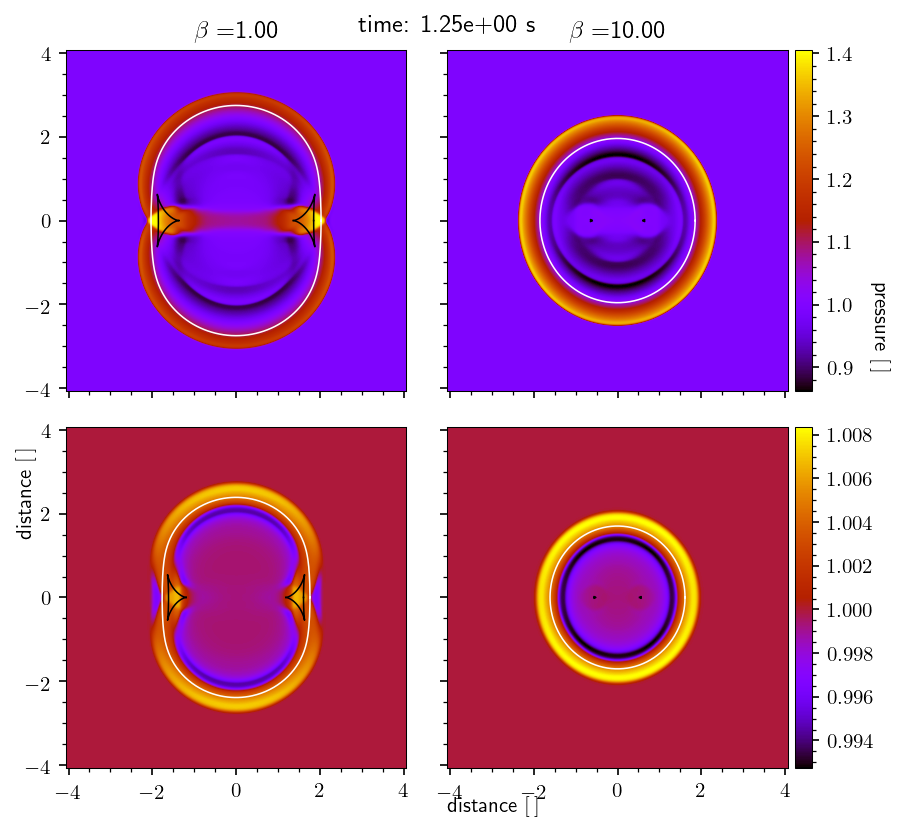

In [32]:
n = 25

CUTOFF = 192
mult = (512-CUTOFF)/512

sim_list = [sims[2],sims[3],sims[6],sims[7]]

fig, ax = plt.subplots(2,2, figsize=(6,5.5))

prs_array = []
min_prs = [1,1]
max_prs = [1,1]

# initialization for plot group speed
THETA = np.linspace(0,2*np.pi,400)
z = np.array([1,0])
E = np.array([[np.cos(theta), np.sin(theta)] for theta in THETA])
speed_multiplier = [1.15, 1.15, 1, 1]
speed_multiplier_s = speed_multiplier
v0 = 1

ex = [x*1e-8*mult for x in extent]

# simulations with high pressure
for i in range(2,4):
    DATA_DIR = "out-raw-Buniform/" + sims[i]["directory"]
    D = pp.pload(n, w_dir=DATA_DIR+"/")
    var = D.prs[CUTOFF:-CUTOFF, CUTOFF:-CUTOFF]
    prs_array.append(var)
    # find the min and max pressure
    if (m := np.min(var)) < min_prs[0]:
        min_prs[0] = m
    if (m := np.max(var)) > max_prs[0]:
        max_prs[0] = m
    del D


# simulations with low pressure
for i in range(6,8):
    DATA_DIR = "out-raw-Buniform/" + sims[i]["directory"]
    D = pp.pload(n, w_dir=DATA_DIR+"/")
    var = D.prs[CUTOFF:-CUTOFF, CUTOFF:-CUTOFF]

    prs_array.append(var)
    # find the min and max pressure
    if (m := np.min(var)) < min_prs[1]:
        min_prs[1] = m
    if (m := np.max(var)) > max_prs[1]:
        max_prs[1] = m
    del D

for i in range(4):
    # initializations
    m = min_prs[i//2]
    M = max_prs[i//2]
    row = i//2
    column = i%2
    axis = ax[row][column]
    # prevent clutter
    if i % 2 != 0:
        axis.set_yticklabels([])
    if i//2 != 1:
        axis.set_xticklabels([])
        
    im = axis.imshow(prs_array[i], vmin=m, 
                        vmax=M, cmap="gnuplot", extent=ex)
    # plot the pressure map
    if i//2==0:
        axis.set_title(r"$\beta=$%.2f" %sim_list[i]["beta"])
    # colorbar on the side
    if i%2==1:
        cbar = fig.colorbar(im, ax=axis, fraction=0.046, pad=0.02)
        cbar.ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    # plot the theoretical group speed
    beta = sim_list[i]["beta"]
    va = np.sqrt(2/(beta))*v0
    vs = np.sqrt(gamma)*v0
    vgf = (np.array([group_fast(va, vs, THETA[i], E[i], z) for i in range(len(THETA))]))*T[n]*speed_multiplier[i]
    vgs = (np.array([group_slow(va, vs, THETA[i], E[i], z) for i in range(len(THETA))]))*T[n]*speed_multiplier_s[i]
    bound1 = (np.array([group_slow(va, vs, THETA[i], E[i], z) for i in range(len(THETA))]) - 0.3*E)*T[n]*speed_multiplier_s[i]
    bound2 = (np.array([group_slow(va, vs, THETA[i], E[i], z) for i in range(len(THETA))]) + 0.3*E)*T[n]*speed_multiplier_s[i]
    
    # fast mode
    axis.plot(vgf[:,0], vgf[:,1], "-w", lw=0.75)
    # slow mode
    axis.plot(vgs[0:100,0], vgs[0:100,1], "-k", lw=0.75)
    axis.plot(vgs[101:300,0], vgs[101:300,1], "-k", lw=0.75)
    axis.plot(vgs[301:400,0], vgs[301:400,1], "-k", lw=0.75)
    # boundary 1
    #axis.plot(bound1[0:100,0], bound1[0:100,1], "--k", lw=0.75)
    #axis.plot(bound1[101:300,0], bound1[101:300,1], "--k", lw=0.75)
    #axis.plot(bound1[301:400,0], bound1[301:400,1], "--k", lw=0.75)
    # boundary 2ize=0.1)
    #axis.plot(bound2[0:100,0], bound2[0:100,1], "--k", lw=0.75)
    #axis.plot(bound2[101:300,0], bound2[101:300,1], "--k", lw=0.75)
    #axis.plot(bound2[301:400,0], bound2[301:400,1], "--k", lw=0.75)
    
    axis.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    axis.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())


# axis labels
fig.text(0.5, 0.02, r"distance $[\,]$", va='center')
fig.text(0.02, 0.4, r"distance $[\,]$", va='center', rotation=90)
fig.text(0.97, 0.6, r"pressure $[\,]$", va="center", rotation=270)

# switch the axes on the side on
for column in range(2):
    ax[1][column].get_xaxis().set_visible(True)
for row in range(2):
    ax[row][0].get_yaxis().set_visible(True)

del prs_array


fig.suptitle("time: %.2e s" %T[n], y=0.98)    

plt.tight_layout()

fig.savefig("../verslag/images/group-speed-pressure2.pdf", dpi=300)

last 4 plots

### Group speed diagrams

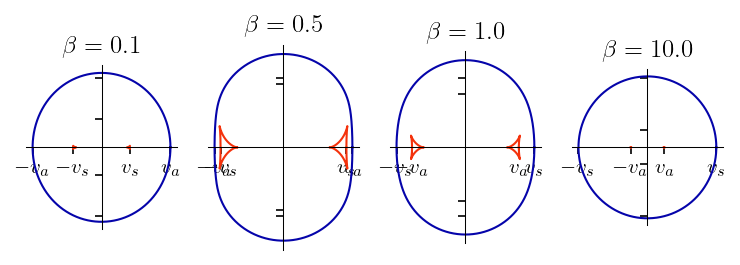

In [21]:
fig, ax = plt.subplots(1,4, figsize=(6,2.5))

z = np.array([1,0])
THETA = np.linspace(0,2*np.pi,4000)
E = np.array([[np.cos(theta), np.sin(theta)] for theta in THETA])
v0 = 1

beta_arr = [0.1, 0.5, 1, 10]

# lay-out parameters
lw=1

for i in range(4):
    axis = ax[i]
    beta = beta_arr[i]
    va = np.sqrt(1/(beta))*v0
    vs = np.sqrt(gamma)*v0
    # calculate the group speeds
    vgf = np.array([group_fast(va, vs, THETA[i], E[i], z) for i in range(len(THETA))])
    vgs = np.array([group_slow(va, vs, THETA[i], E[i], z) for i in range(len(THETA))])
    # plot fast mode
    axis.plot(vgf[:,0], vgf[:,1],lw=lw)
    # plot slow mode
    axis.plot(vgs[0:1000,0], vgs[0:1000,1], color="xkcd:vermillion", lw=lw)
    axis.plot(vgs[1001:3000,0], vgs[1001:3000,1], color="xkcd:vermillion",lw=lw)
    axis.plot(vgs[3001:4000,0], vgs[3001:4000,1], color="xkcd:vermillion",lw=lw)
    axis.set_aspect("equal")
    # axes through the origin
    axis.spines["left"].set_position("zero")
    axis.spines["bottom"].set_position("zero")
    axis.spines["top"].set_color("none")
    axis.spines["right"].set_color("none")
    # custom axis labels
    axis.set_xticks([-vs, +vs, -va, va])
    axis.set_xticklabels([r"$-v_s$", r"$v_s$", r"$-v_a$", r"$v_a$"])
    axis.set_yticks([-vs, +vs, -va, va])
    axis.set_yticklabels([])
    # axis title
    axis.set_title(r"$\beta=%.1f$"%beta, size=12)
    
#plt.suptitle(r"Group speed of MHD waves for different values of $\beta$")
plt.show()

fig.savefig("../verslag/images/MHD-group-speed.pdf")

## experimenteren lay-out plots

plot of phase speed

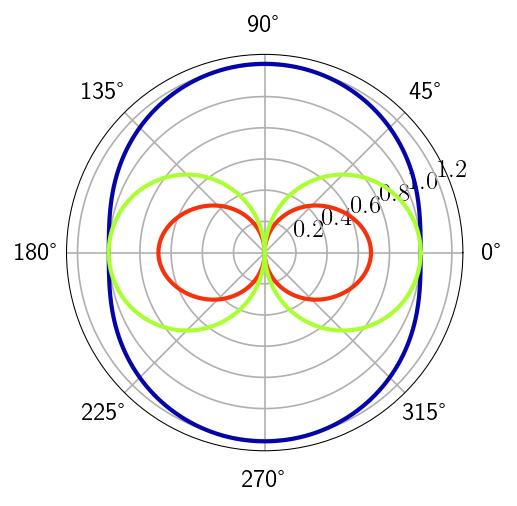

In [167]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

beta = 0.774
gamma = 5/3
va = np.sqrt(1/(beta))*v0
vs = np.sqrt(gamma)*v0

va = 1
vs = np.sqrt(beta/gamma)*va

THETA = np.linspace(0,2*np.pi,400)
ax.plot(THETA, phase_fast(va,vs,THETA))
ax.plot(THETA, phase_slow(va,vs,THETA))
ax.plot(THETA, np.abs(phase_alfven(va, THETA)))

Group speed Michaël manier

```
def group_fast(va, vs, theta, k):
    t = np.array([-k[1], k[0]])
    vp = phase_fast(va,vs,theta)
    return vp*k + va**2*vs**2*np.cos(theta)*np.sin(theta)*t/(vp*np.sqrt((va**2+vs**2)**2-4*va**2*vs**2*np.cos(theta)**2))

def group_slow(va, vs, theta, k):
    t = np.array([-k[1], k[0]])
    vp = phase_slow(va,vs,theta)
    return vp*k - va**2*vs**2*np.cos(theta)*np.sin(theta)*t/(vp*np.sqrt((va**2+vs**2)**2-4*va**2*vs**2*np.cos(theta)**2))
  ```

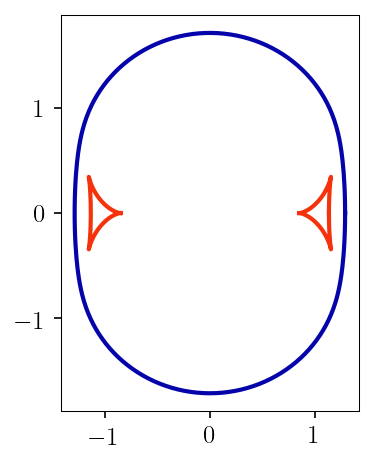

In [165]:
z = np.array([1,0])
E = np.array([[np.cos(theta), np.sin(theta)] for theta in THETA])

v0 = 1
beta = 0.774
va = np.sqrt(1/(beta))*v0
vs = np.sqrt(gamma)*v0

vgf = np.array([group_fast(va, vs, THETA[i], E[i], z) for i in range(len(THETA))])
vgs = np.array([group_slow(va, vs, THETA[i], E[i], z) for i in range(len(THETA))])

fig, ax = plt.subplots(1,1)

ax.plot(vgf[:,0], vgf[:,1])
ax.plot(vgs[0:100,0], vgs[0:100,1], color="xkcd:vermillion")
ax.plot(vgs[101:300,0], vgs[101:300,1], color="xkcd:vermillion")
ax.plot(vgs[301:400,0], vgs[301:400,1], color="xkcd:vermillion")
ax.set_aspect("equal")

Reading Data file : out-raw-Buniform/beta01//data.0015.dbl
Reading Data file : out-raw-Buniform/beta05//data.0015.dbl
Reading Data file : out-raw-Buniform/beta1//data.0015.dbl
Reading Data file : out-raw-Buniform/beta10//data.0015.dbl
0.7611382355351661 2.5513093773882822
Reading Data file : out-raw-Buniform/ulow-beta01//data.0015.dbl
Reading Data file : out-raw-Buniform/ulow-beta05//data.0015.dbl
Reading Data file : out-raw-Buniform/ulow-beta1//data.0015.dbl
Reading Data file : out-raw-Buniform/ulow-beta10//data.0015.dbl


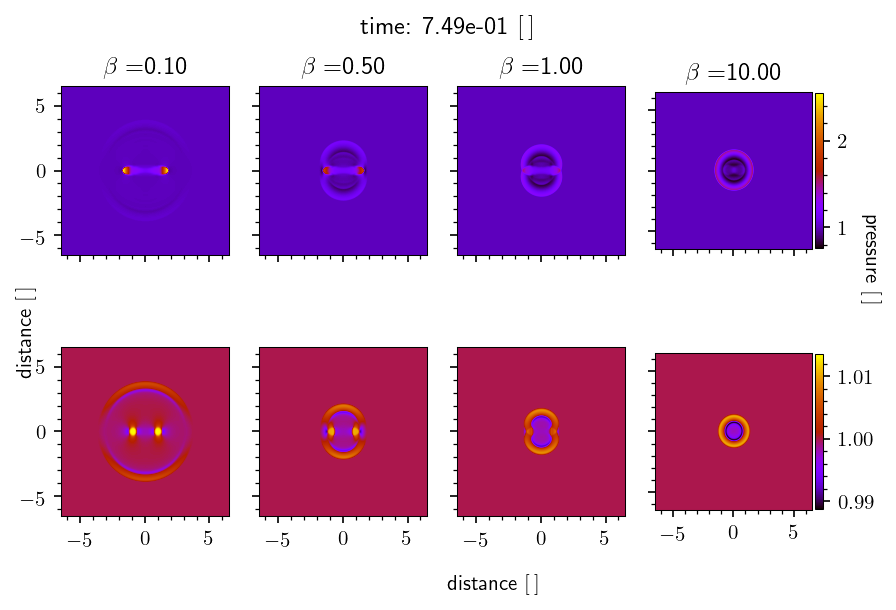

In [37]:
n = 15

fig, ax = plt.subplots(2,4, figsize=(6,4))

prs_array = []
min_prs = [1,1]
max_prs = [1,1]

ex = [x*1e-8 for x in extent]

# simulations with high pressure
for i in range(4):
    DATA_DIR = "out-raw-Buniform/" + sims[i]["directory"]
    D = pp.pload(n, w_dir=DATA_DIR+"/")
    var = D.prs
    prs_array.append(var)
    # find the min and max pressure
    if (m := np.min(var)) < min_prs[0]:
        min_prs[0] = m
    if (m := np.max(var)) > max_prs[0]:
        max_prs[0] = m
    del D

print(min_prs[0],max_prs[0])
    
# simulations with low pressure
for i in range(4,8):
    DATA_DIR = "out-raw-Buniform/" + sims[i]["directory"]
    D = pp.pload(n, w_dir=DATA_DIR+"/")
    var = D.prs
    
    prs_array.append(var)
    # find the min and max pressure
    if (m := np.min(var)) < min_prs[1]:
        min_prs[1] = m
    if (m := np.max(var)) > max_prs[1]:
        max_prs[1] = m
    del D

for i in range(8):
    m = min_prs[i//4]
    M = max_prs[i//4]
    row = i//4
    column = i%4
    axis = ax[row][column]
    # prevent clutter
    if i % 4 != 0:
        axis.set_yticklabels([])
    if i//4 != 1:
        axis.set_xticklabels([])
    im = ax[row][column].imshow(prs_array[i], vmin=m, 
                        vmax=M, cmap="gnuplot", extent=ex)
    if sims[i]["low"] and i//4==0:
        ax[row][column].set_title(r"$\beta=$%.2f" %sims[i]["beta"])
    elif i//4==0:
        ax[row][column].set_title(r"$\beta=$%.2f" %sims[i]["beta"])
    
    if i%4==3:
        cbar = fig.colorbar(im, ax=axis, fraction=0.046, pad=0.02)
        cbar.ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    axis.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    axis.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    

# axis labels
fig.text(0.5, 0.03, r"distance $[\,]$", va='center')
fig.text(0.02, 0.45, r"distance $[\,]$", va='center', rotation=90)
fig.text(0.96, 0.57, r"pressure $[\,]$", va="center", rotation=270)

# switch the axes on the side on
for column in range(4):
    ax[1][column].get_xaxis().set_visible(True)
for row in range(2):
    ax[row][0].get_yaxis().set_visible(True)

del prs_array


fig.suptitle(r"time: %.2e $[\,]$" %T[n], y=0.98)    

plt.tight_layout()

fig.savefig("../verslag/images/MHD-blasts.pdf", dpi=300)
#plt.close(fig=fig)
plt.show()

## Individual plots

Reading Data file : out-raw/low-beta05/data.0014.dbl


IndexError: index 14 is out of bounds for axis 0 with size 11

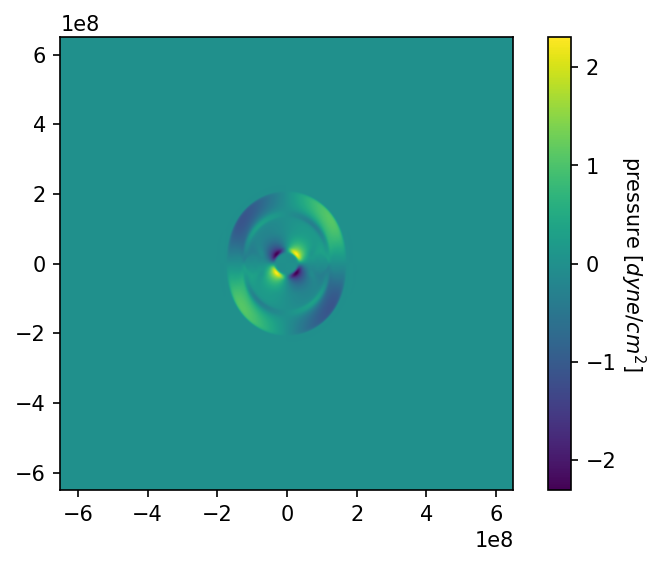

In [20]:
sim = sims[5]
n = 14

D = pp.pload(n, w_dir="out-raw/"+sim["directory"])

fig, ax = plt.subplots(1,1)

##im=ax.imshow(np.log(plotvar[i]), vmin=np.log(MIN), vmax=np.log(MAX), cmap="plasma")
##im=ax.imshow(D.prs, cmap="plasma", extent=extent, vmin=8, vmax=16)
im=ax.imshow(D.Bx1*UNIT_PRESSURE, cmap="viridis", extent=extent)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('pressure [$dyne/cm^2$]', rotation=270, labelpad=15.0)


### streamlines for magnetic field
side = np.linspace(extent[0], extent[1], 1024)
X, Y = np.meshgrid(side, side)
#ax.streamplot(X, Y, D.Bx1, D.Bx2, maxlength=2000, linewidth=1, 
#              color=np.sqrt(D.Bx1**2+D.Bx2**2), 
#              density=4, arrowsize=0, cmap="winter")

if sim["low"]:
    plt.title(r"low pressure difference; $\beta=$ %f; time: %.3e s" %(sim["beta"],T [n]), pad=15.0)
else:
    plt.title(r"high pressure difference; $\beta=$ %f; time: %.3e s" %(sim["beta"], T[n]), pad=15.0)
ax.set_xlabel("x-axis [cm]")
ax.set_ylabel("y-axis [cm]")


In [ ]:
img = imread('test-image.png')

plt.imshow(img)